In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Alexa-Dataset.csv")

In [4]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df.shape

(3150, 5)

In [8]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

# Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\siddhiraj yele\AppData\Local\Temp\ipykernel_15080\4214687043.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["feedback"], palette=["red", "green"])


([<matplotlib.axis.XTick at 0x183ce862990>,
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive')])

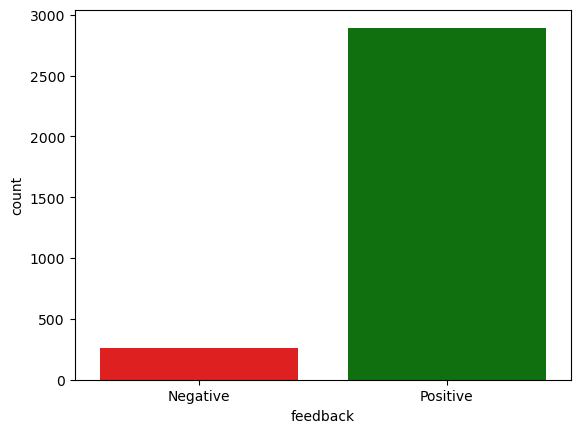

In [11]:
sns.countplot(x=df["feedback"], palette=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])

# Plot the graph of Ratings distribution.

C:\Users\siddhiraj yele\AppData\Local\Temp\ipykernel_15080\1266232429.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["rating"], palette="viridis")


<Axes: xlabel='rating', ylabel='count'>

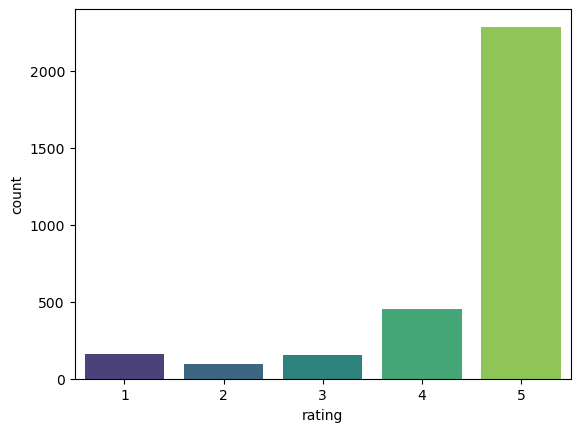

In [12]:
sns.countplot(x=df["rating"], palette="viridis")

In [13]:
import re
import string
import nltk

# Convert the review text into lowercase

In [33]:
Alexa_dataset_lower = df.apply(lambda x: x.astype(str).str.lower())
Alexa_dataset_lower

,rating,date,variation,verified_reviews,feedback
0,5,31-jul-18,charcoal fabric,love my echo!,1
1,5,31-jul-18,charcoal fabric,loved it!,1
2,4,31-jul-18,walnut finish,"sometimes while playing a game, you can answer...",1
3,5,31-jul-18,charcoal fabric,i have had a lot of fun with this thing. my 4 ...,1
4,5,31-jul-18,charcoal fabric,music,1
...,...,...,...,...,...
3145,5,30-jul-18,black dot,"perfect for kids, adults and everyone in betwe...",1
3146,5,30-jul-18,black dot,"listening to music, searching locations, check...",1
3147,5,30-jul-18,black dot,"i do love these things, i have them running my...",1
3148,5,30-jul-18,white dot,only complaint i have is that the sound qualit...,1


# Remove all punctuations from review text.

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#In below code first check if text is a string or not and if it is not string then return empty value

In [44]:
import string

def remove_punctuation(text):
    if isinstance(text, str): 
        return "".join([char for char in text if char not in string.punctuation])
    return ""  

df["clean_msg"] = df["verified_reviews"].apply(remove_punctuation)


In [45]:
df["clean_msg"]

0                                            Love my Echo
1                                                Loved it
2       Sometimes while playing a game you can answer ...
3       I have had a lot of fun with this thing My 4 y...
4                                                   Music
                              ...                        
3145      Perfect for kids adults and everyone in between
3146    Listening to music searching locations checkin...
3147    I do love these things i have them running my ...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: clean_msg, Length: 3150, dtype: object

# Remove emoticons and emojis from the text

In [46]:
import re

In [52]:
def preprocess_text(text):
    if isinstance(text, str):  
        return re.sub(r"[^\w\s]", "", text) 
    return "" 
df["cleaned_reviews"] = df["verified_reviews"].apply(preprocess_text)

In [53]:
df["cleaned_reviews"]

0                                            Love my Echo
1                                                Loved it
2       Sometimes while playing a game you can answer ...
3       I have had a lot of fun with this thing My 4 y...
4                                                   Music
                              ...                        
3145      Perfect for kids adults and everyone in between
3146    Listening to music searching locations checkin...
3147    I do love these things i have them running my ...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: cleaned_reviews, Length: 3150, dtype: object

# Tokenize the review text into words.

In [54]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
df['msg_tokenied']= df['cleaned_reviews'].apply(lambda x: tokenization(x))

In [55]:
df['msg_tokenied']

0                                          [Love my Echo]
1                                              [Loved it]
2       [Sometimes while playing a game you can answer...
3       [I have had a lot of fun with this thing My 4 ...
4                                                 [Music]
                              ...                        
3145    [Perfect for kids adults and everyone in between]
3146    [Listening to music searching locations checki...
3147    [I do love these things i have them running my...
3148    [Only complaint I have is that the sound quali...
3149                                               [Good]
Name: msg_tokenied, Length: 3150, dtype: object

# Remove the Stopwords from the tokenized text.

In [57]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\siddhiraj
[nltk_data]     yele\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [61]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["review_stop"] = df["msg_tokenied"].apply(lambda text: remove_stopwords(text))
df["review_stop"]

0                                           ['Love Echo']
1                                            ['Loved it']
2       ['Sometimes playing game answer question corre...
3       ['I lot fun thing My 4 yr old learns dinosaurs...
4                                               ['Music']
                              ...                        
3145             ['Perfect kids adults everyone between']
3146    ['Listening music searching locations checking...
3147    ['I love things running entire home TV lights ...
3148    ['Only complaint I sound quality isnt great I ...
3149                                             ['Good']
Name: review_stop, Length: 3150, dtype: object

# Perform stemming & lemmatization on the review text.

In [60]:
from nltk.stem.porter import PorterStemmer

In [62]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["review_stemmed"] = df["review_stop"].apply(lambda text: stem_words(text))
df["review_stemmed"]

0                                           ['love echo']
1                                             ['love it']
2       ['sometim play game answer question correctli ...
3       ['i lot fun thing my 4 yr old learn dinosaur c...
4                                               ['music']
                              ...                        
3145                ['perfect kid adult everyon between']
3146    ['listen music search locat check time look we...
3147    ['i love thing run entir home tv light thermos...
3148    ['onli complaint i sound qualiti isnt great i ...
3149                                             ['good']
Name: review_stemmed, Length: 3150, dtype: object

In [63]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\siddhiraj
[nltk_data]     yele\AppData\Roaming\nltk_data...


True

In [64]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["review_lemmatized"] = df["review_stop"].apply(lambda text: lemmatize_words(text))

In [65]:
df["review_lemmatized"]

0                                           ['Love Echo']
1                                            ['Loved it']
2       ['Sometimes playing game answer question corre...
3       ['I lot fun thing My 4 yr old learns dinosaur ...
4                                               ['Music']
                              ...                        
3145               ['Perfect kid adult everyone between']
3146    ['Listening music searching location checking ...
3147    ['I love thing running entire home TV light th...
3148    ['Only complaint I sound quality isnt great I ...
3149                                             ['Good']
Name: review_lemmatized, Length: 3150, dtype: object

# Perform the word vectorization on review text using Bag of Words technique.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
reviews = df["review_lemmatized"].astype(str)

In [74]:
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(reviews)

In [75]:
bow_matrix.shape

(3150, 4265)

# Create representation of Review Text by calculating Term Frequency and Inverse Document Frequency (TF-IDF)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

In [80]:
tfidf_matrix.shape

(3150, 4265)